In [1]:
from modelo_tweets import *

In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-d

In [10]:
partidos=pd.read_csv('entradas/Partidos.csv')
manifestaciones=pd.read_csv('entradas/Manifestaciones.csv')
f_especiales=pd.read_csv('entradas/FechasEspeciales.csv')

partidos_M=pd.to_datetime(partidos['Fecha'].dropna())
partidos_S=pd.to_datetime(partidos['Fecha.1'].dropna())
manifestaciones=pd.to_datetime(manifestaciones['Fecha'].dropna())
f_especiales=pd.to_datetime(f_especiales[['2019','2020']].values.flatten())
f_especiales=f_especiales[~f_especiales.isna()]

def TC(t):
    return np.array([(pd.Timestamp(t.date()) == partidos_M).sum(),
                     (pd.Timestamp(t.date()) == partidos_S).sum(),
                     (pd.Timestamp(t.date()) == manifestaciones).sum(),
                     (pd.Timestamp(t.date()) == f_especiales).sum(),
                     t.weekday()/6.0,(t.hour > 12)*1,1
                    ])

In [11]:
with open('entradas/data_tweets.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [33]:
results_by_split={}
for i in range(4,12):
    train_period=('2019-'+str(i).zfill(2)+'-01 00:00',
                  '2019-'+str(i+1).zfill(2)+'-01 00:00')
    results={}
    results_cum={}    
    for j in range(2,30,2):
        validate_period=('2019-'+str(i+1).zfill(2)+'-01 00:00',
                         '2019-'+str(i+1).zfill(2)+'-'+str(j).zfill(2)+' 00:00')

        model=modelTweets(data,
                          train_period,
                          validate_period,
                          f_covariates=(func,restore_date),
                          followers_rate=4,
                          win_size_pred_period=1
                         )
        model.train()
        model.compute_lambda_predict()
        model.compute_errors()
        results[j]=model.errors_predict
        results_cum[j]=model.errors_predict_cum
    results_by_split[train_period]=[results,results_cum]

('2019-04-01 00:00', '2019-05-01 00:00')
('2019-05-01 00:00', '2019-05-02 00:00')
('2019-05-01 00:00', '2019-05-04 00:00')
('2019-05-01 00:00', '2019-05-06 00:00')
('2019-05-01 00:00', '2019-05-08 00:00')
('2019-05-01 00:00', '2019-05-10 00:00')
('2019-05-01 00:00', '2019-05-12 00:00')
('2019-05-01 00:00', '2019-05-14 00:00')
('2019-05-01 00:00', '2019-05-16 00:00')
('2019-05-01 00:00', '2019-05-18 00:00')
('2019-05-01 00:00', '2019-05-20 00:00')
('2019-05-01 00:00', '2019-05-22 00:00')
('2019-05-01 00:00', '2019-05-24 00:00')
('2019-05-01 00:00', '2019-05-26 00:00')
('2019-05-01 00:00', '2019-05-28 00:00')
---------------
('2019-05-01 00:00', '2019-06-01 00:00')
('2019-06-01 00:00', '2019-06-02 00:00')
('2019-06-01 00:00', '2019-06-04 00:00')
('2019-06-01 00:00', '2019-06-06 00:00')
('2019-06-01 00:00', '2019-06-08 00:00')
('2019-06-01 00:00', '2019-06-10 00:00')
('2019-06-01 00:00', '2019-06-12 00:00')
('2019-06-01 00:00', '2019-06-14 00:00')
('2019-06-01 00:00', '2019-06-16 00:00')


In [3]:
with open('errors_times.pickle', 'rb') as f:
    x = pickle.load(f)

In [5]:
x.keys()

dict_keys([('2019-04-01 00:00', '2019-05-01 00:00'), ('2019-05-01 00:00', '2019-06-01 00:00'), ('2019-06-01 00:00', '2019-07-01 00:00'), ('2019-07-01 00:00', '2019-08-01 00:00'), ('2019-08-01 00:00', '2019-09-01 00:00'), ('2019-09-01 00:00', '2019-10-01 00:00'), ('2019-10-01 00:00', '2019-11-01 00:00'), ('2019-11-01 00:00', '2019-12-01 00:00')])

,times,values
0,1,-0.396392
1,3,-0.287472
3,7,-0.256756
5,11,-0.237048
4,9,-0.232510


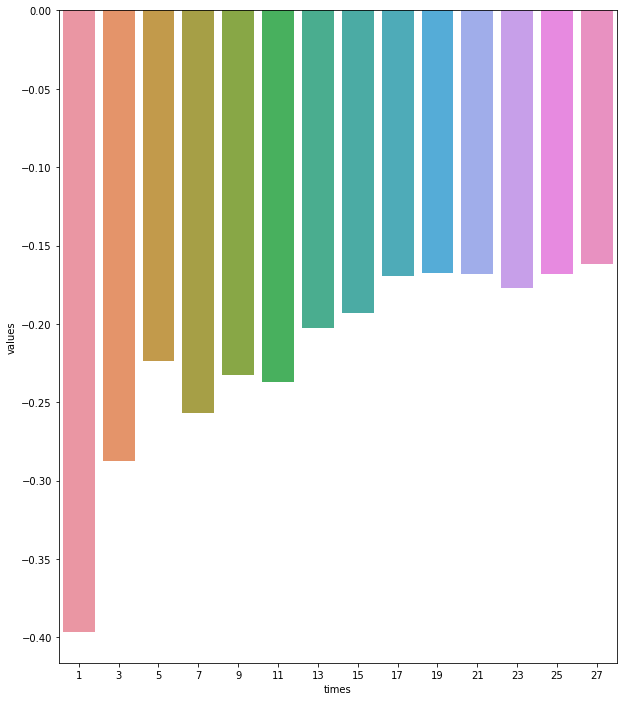

In [20]:
Pearson=pd.DataFrame({'times':list(x.keys()),'values':[x[i]['Pearson'][0] for i in x]})
plt.figure(figsize=(10,12))
sns.barplot(data=Pearson,y='values',x='times')
Pearson.sort_values('values').head()

,times,values
13,27,39.807462
12,25,41.522065
10,21,42.022010
9,19,42.041617
8,17,43.224583


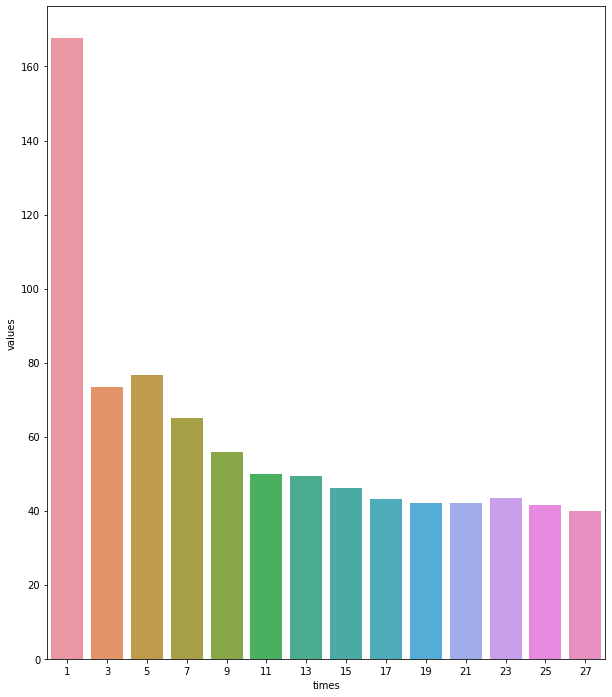

In [22]:
MAE=pd.DataFrame({'times':list(x.keys()),'values':[x[i]['MAE'] for i in x]})
plt.figure(figsize=(10,12))
sns.barplot(data=MAE,y='values',x='times')
MAE.sort_values('values').head()

In [23]:
with open('errors_times_cov.pickle', 'rb') as f:
    y = pickle.load(f)

,times,values
13,27,1.475293
12,25,1.586705
11,23,1.718257
10,21,1.871453
9,19,2.033006


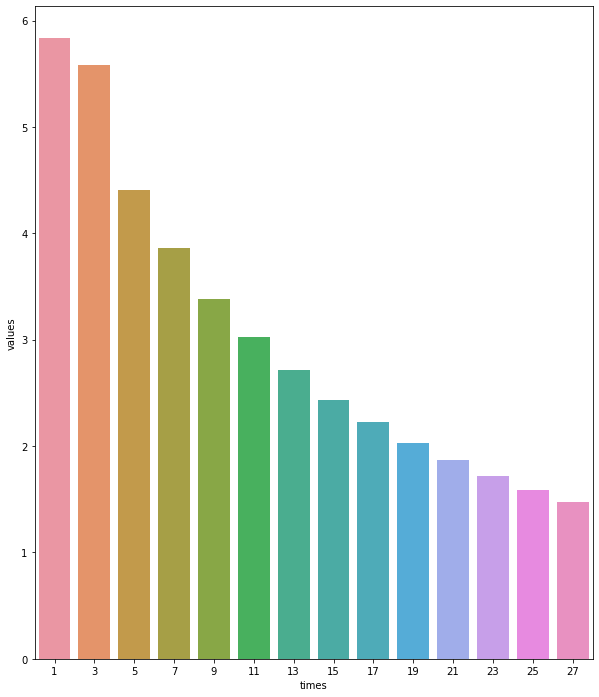

In [24]:
MAPE=pd.DataFrame({'times':list(y.keys()),'values':[y[i]['MAPE'] for i in y]})
plt.figure(figsize=(10,12))
sns.barplot(data=MAPE,y='values',x='times')
MAPE.sort_values('values').head()

In [25]:
y

{1: {'APE': array([ 1.63260928,  2.87148424,  3.81574868,  4.16197898,  4.22343111,
          3.87520237,  3.74955282,  3.57845092,  3.55643914,  3.32994947,
          3.02204196,  2.79703262,  2.819634  ,  4.10224198,  5.42213817,
          6.79525676,  8.04336973,  9.33491737, 10.46563937, 11.40532517,
         11.71260987, 11.84872433, 11.76780995]),
  'MAPE': 5.8405038385759305,
  'MSE': 3028466.9444026565,
  'MAE': 1255.0654925844478,
  'RMSE': 1740.2491041235035,
  'Pearson': (0.8757634707472107, 4.422706823649344e-08),
  'kendall': KendalltauResult(correlation=1.0, pvalue=7.736340341261367e-23)},
 3: {'APE': array([ 1.63260928,  2.98880194,  3.81574868,  4.48460267,  4.48460267,
          4.19593937,  3.9011343 ,  3.65948545,  3.66407156,  3.53898152,
          3.25863266,  2.94891392,  2.88908189,  4.19136411,  5.47679466,
          6.79525676,  8.11873114,  9.3774479 , 10.700591  , 11.55184476,
         12.44043104, 12.47768286, 12.59688852, 12.49571949, 11.79485639,
         